<a href="https://colab.research.google.com/github/harshs-data/Machine-Learning/blob/main/Model_using_logistic_regression_and_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

# Load the basic MNIST digits
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist["data"], mnist["target"]
print(X.shape) # (70000, 784)

(70000, 784)


In [47]:
y = y.astype(int)
X = X / 255.0

In [48]:
df  = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [49]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


### Standard Scalar

In [52]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

### PCA

In [53]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


### Logistic Regression

In [54]:
lor = LogisticRegression(penalty = None, solver = 'sag', multi_class = 'multinomial')
lor.fit(X_train_pca, y_train)
y_pred = lor.predict(X_test_pca)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [55]:
## acc_score

acc = accuracy_score(y_test, y_pred)
print(acc)

0.3360714285714286


In [56]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

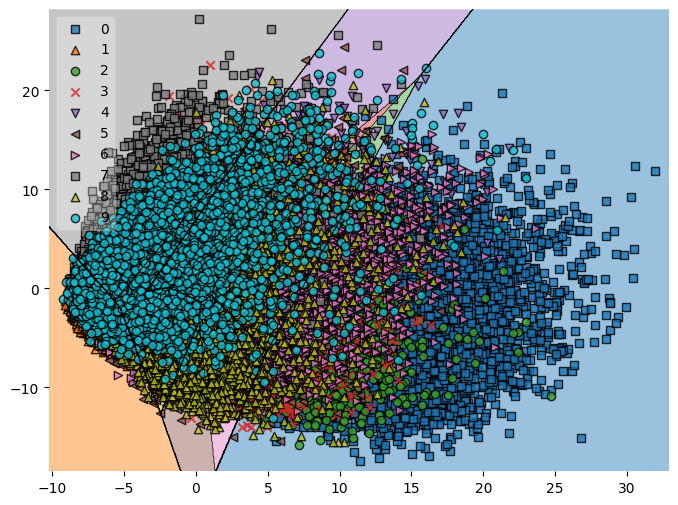

In [57]:
plt.figure(figsize=(8, 6))

plot_decision_regions(
    X=X_train_pca,
    y=y_train.astype(np.int_),
    clf=lor,
    legend=2
)